In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.table import Table

In [0]:
url = 'https://raw.githubusercontent.com/firdhoyuwandha/data/master/mtcars.csv'
d = pd.read_csv(url)

In [0]:
df=pd.DataFrame(d)

In [0]:
mpg_level=[]
manufactures=[]
for i in range(32):
  if df['mpg'][i]<20:
    mpg_level.append('low')
  elif df['mpg'][i]<=30:
    mpg_level.append('medium')
  else:
    mpg_level.append('high')
  manufactures.append(df['Cars'][i].partition(' ')[0])
df['mpg_level']=mpg_level
df['manufactures']=manufactures

In [6]:
df[['mpg','mpg_level']]

,mpg,mpg_level
0,21.0,medium
1,21.0,medium
2,22.8,medium
3,21.4,medium
4,18.7,low
5,18.1,low
6,14.3,low
7,24.4,medium
8,22.8,medium
9,19.2,low


In [7]:
df[['Cars','manufactures']]

,Cars,manufactures
0,Mazda RX4,Mazda
1,Mazda RX4 Wag,Mazda
2,Datsun 710,Datsun
3,Hornet 4 Drive,Hornet
4,Hornet Sportabout,Hornet
5,Valiant,Valiant
6,Duster 360,Duster
7,Merc 240D,Merc
8,Merc 230,Merc
9,Merc 280,Merc


In [8]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Text(0, 0.5, 'hp')

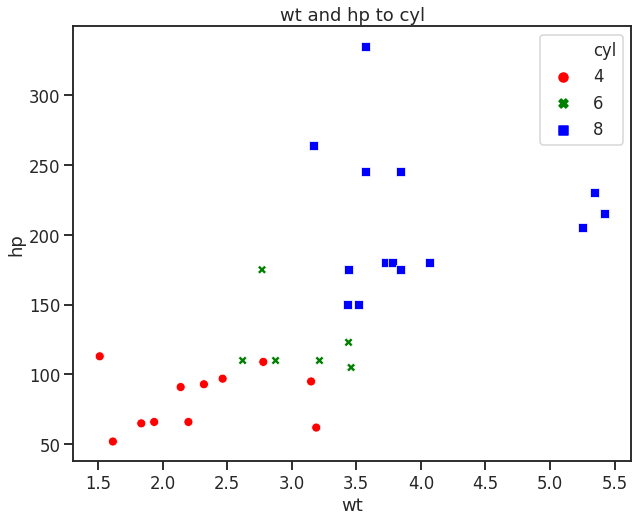

In [9]:
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['wt'], y=df['hp'], hue=df['cyl'], palette=['red','green','blue'], style=df['cyl'], legend='brief')
plt.title('wt and hp to cyl')
plt.xlabel('wt')
plt.ylabel('hp')

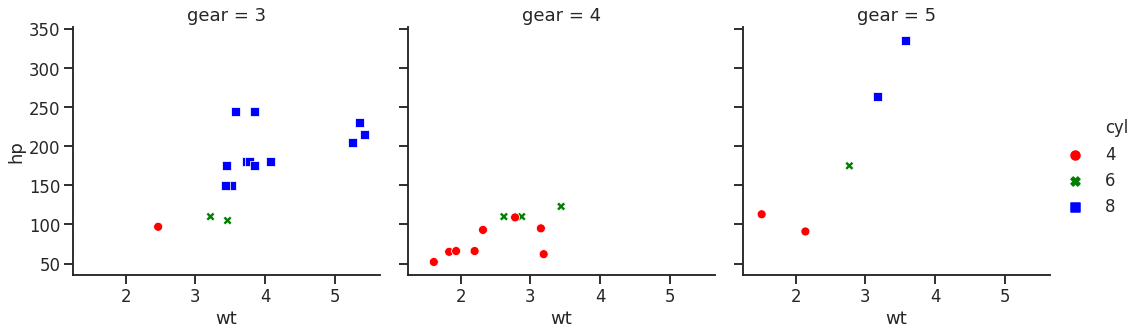

In [10]:
sns.set_style('ticks')
sns.set_context('talk')
g = sns.relplot(x='wt', y='hp', hue='cyl', palette=['red','green','blue'], col='gear', data=df, style='cyl')
g.set_xlabels('wt')
g.set_ylabels('hp');

In [0]:
t_gear=pd.crosstab(df['gear'], df['manufactures'], margins=True, margins_name="Total")

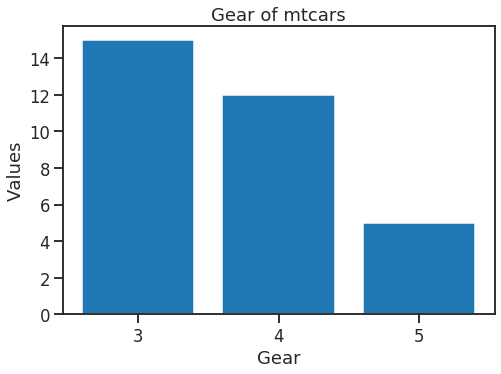

In [31]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels=['3', '4', '5']
size=t_gear['Total'][:3]
ax.set_xlabel('Gear')
ax.set_ylabel('Values')
ax.set_title('Gear of mtcars')
ax.bar(labels,size)
plt.show()

In [0]:
t_carb=pd.crosstab(df['carb'], df['manufactures'], margins=True, margins_name="Total")

In [35]:
t_carb['Total']

carb
1         7
2        10
3         3
4        10
6         1
8         1
Total    32
Name: Total, dtype: int64

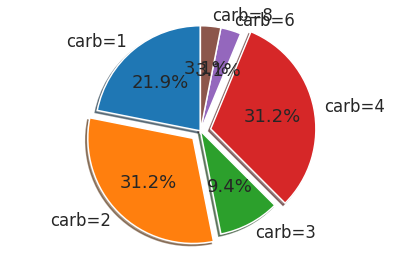

In [39]:
explode = (0, 0.1, 0, 0.1, 0, 0)  
fig, ax = plt.subplots()
labels = ['carb=1', 'carb=2', 'carb=3', 'carb=4', 'carb=6', 'carb=8']
size = t_carb['Total'][:6]
ax.pie(size, explode=explode, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
ax.axis('equal')  
plt.tight_layout()
plt.show()

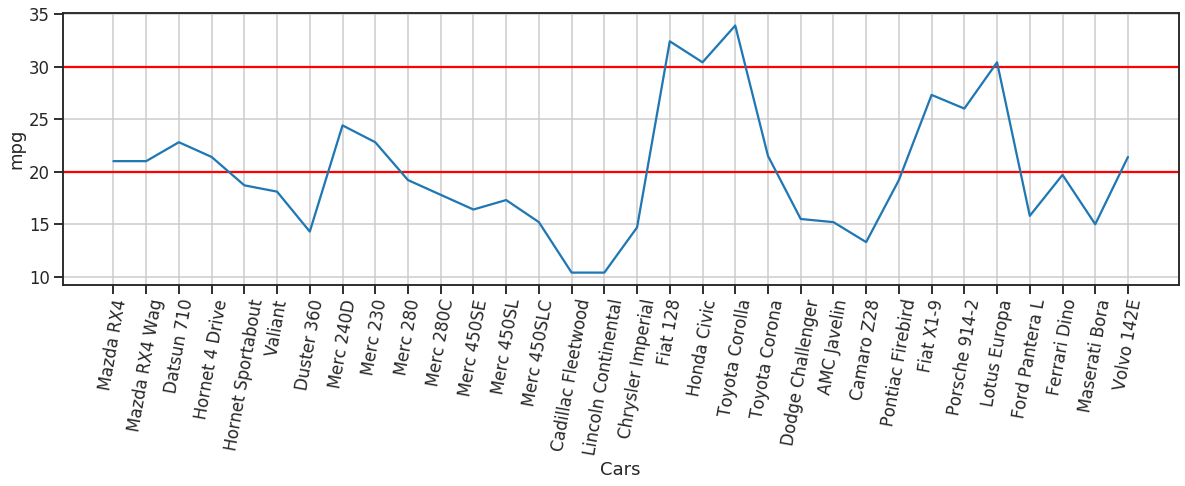

In [45]:
plt.figure(figsize=(20,5))
plt.xlabel('Cars')
plt.ylabel('mpg')
plt.xticks(rotation=80)
plt.grid(True)
plt.axhline(y=20, color='red', linestyle='-')
plt.axhline(y=30, color='red', linestyle='-')
plt.plot(df['Cars'], df['mpg'])